In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

PyTorch:

torch: Pustaka utama untuk operasi tensor dan deep learning.
torch.nn: Modul untuk membuat arsitektur neural network.
torch.optim: Modul untuk algoritma optimasi (contoh: SGD, Adam).
torch.utils.data: Untuk pengelolaan dataset, batching, dan sampling.
Matplotlib:

pyplot: Membuat visualisasi seperti grafik loss dan accuracy.
NumPy:

Operasi matematis pada array multidimensi.
Sklearn:

make_classification: Membuat data dummy untuk klasifikasi.
train_test_split: Membagi dataset menjadi train dan test.
StandardScaler: Standarisasi fitur data.
accuracy_score: Menghitung akurasi model.

In [13]:
torch.manual_seed(42)
np.random.seed(42)

Penjelasan Ringkas:
torch.manual_seed(42): Menetapkan nilai seed untuk operasi acak di PyTorch agar hasil yang dihasilkan tetap konsisten setiap kali kode dijalankan.
np.random.seed(42): Menetapkan nilai seed untuk operasi acak di NumPy dengan tujuan yang sama, memastikan reproducibility.
Dengan nilai seed yang sama, eksperimen akan menghasilkan hasil yang identik setiap kali dijalankan.

In [14]:
def plot_losses(train_losses, val_losses):
    plt.plot(train_losses, label='Training Loss')  # Membuat grafik untuk Training Loss
    plt.plot(val_losses, label='Validation Loss')  # Membuat grafik untuk Validation Loss
    plt.xlabel('Epochs')  # Memberi label pada sumbu X (jumlah epoch)
    plt.ylabel('Loss')  # Memberi label pada sumbu Y (nilai loss)
    plt.legend()  # Menampilkan legenda untuk membedakan Training dan Validation Loss
    plt.title('Loss vs Epochs')  # Memberi judul pada grafik
    plt.show()  # Menampilkan grafik


In [15]:
def generate_dummy_data(n_samples=1000):
    X, y = make_classification(
        n_samples=n_samples, n_features=20, n_classes=2, random_state=42
    )  # Membuat data dummy untuk klasifikasi
    return X, y  # Mengembalikan fitur (X) dan label (y)


In [16]:
def load_heart_disease_data():
    import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi data
    dataset_url = '/content/sample_data/heart.csv'  # Lokasi file dataset
    columns = [
        "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang",
        "oldpeak", "slope", "ca", "thal", "target"
    ]  # Daftar nama kolom dalam dataset
    data = pd.read_csv(dataset_url, header=None, names=columns, na_values="?")
    # Membaca dataset dari file CSV dengan nama kolom yang ditentukan, mengubah "?" menjadi NaN
    data = data.dropna()  # Menghapus baris dengan nilai NaN
    X = data.iloc[:, :-1].values  # Memisahkan fitur (semua kolom kecuali kolom terakhir)
    y = (data.iloc[:, -1].values > 0).astype(int)
    # Binary classification: target 1 jika ada penyakit jantung, 0 jika tidak
    return X, y  # Mengembalikan fitur (X) dan label target (y)


In [17]:
def preprocess_data(X, y):
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val, dtype=torch.long)
    return X_train_tensor, X_val_tensor, y_train_tensor, y_val_tensor

Fungsi preprocess_data mempersiapkan data dengan langkah-langkah:

Scaling fitur menggunakan StandardScaler.
Membagi data menjadi training dan validasi dengan rasio 80:20.
Mengkonversi data ke tensor PyTorch.
Hasilnya adalah X_train_tensor, X_val_tensor, y_train_tensor, dan y_val_tensor siap digunakan untuk model PyTorch.


In [18]:
def create_mlp(input_dim, hidden_layers, activation_fn):
    layers = []
    in_dim = input_dim
    for out_dim in hidden_layers:
        layers.append(nn.Linear(in_dim, out_dim))
        layers.append(activation_fn)
        in_dim = out_dim
    layers.append(nn.Linear(in_dim, 2))  # Output layer for binary classification
    return nn.Sequential(*layers)

Fungsi create_mlp membuat arsitektur MLP dengan input dimensi, lapisan tersembunyi, dan fungsi aktivasi.
Outputnya adalah model nn.Sequential dengan lapisan penuh dan lapisan output untuk klasifikasi biner.

In [19]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    train_losses, val_losses = [], []
    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        train_losses.append(epoch_loss / len(train_loader))

        # Validation phase
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for X_val, y_val in val_loader:
                outputs = model(X_val)
                loss = criterion(outputs, y_val)
                val_loss += loss.item()
        val_losses.append(val_loss / len(val_loader))

    return train_losses, val_losses

Fungsi train_model melatih model dengan proses:

Training: iterasi batch, menghitung loss, dan update model.
Validation: evaluasi loss di validasi set.
Kembalikan loss dari training dan validasi.

In [20]:
activation_functions = [
    nn.ReLU(), nn.Sigmoid(), nn.Tanh()
]
hidden_layer_configs = [
    [4], [8, 16], [32, 64, 128]
]
learning_rates = [0.1, 0.01, 0.001, 0.0001]
batch_sizes = [16, 32, 64]
epochs_list = [25, 50, 100]

Konfigurasi:

Aktivasi: ReLU, Sigmoid, Tanh.
Lapisan tersembunyi: [4], [8, 16], [32, 64, 128].
Learning rate: 0.1, 0.01, 0.001, 0.0001.
Batch size: 16, 32, 64.
Epochs: 25, 50, 100.

In [21]:
X_dummy, y_dummy = generate_dummy_data()
X_train, X_val, y_train, y_val = preprocess_data(X_dummy, y_dummy)
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

generate_dummy_data(): Membuat data dummy untuk fitur (X_dummy) dan target (y_dummy).
preprocess_data(X_dummy, y_dummy): Memroses data (standarisasi, pembagian train/val, konversi ke tensor).
TensorDataset: Membuat dataset PyTorch untuk data latih (train_dataset) dan validasi (val_dataset).

Hidden Layers: [4], Activation: ReLU(), LR: 0.1, Batch: 16, Epochs: 25
Training Loss: 0.3398, Validation Loss: 0.5222


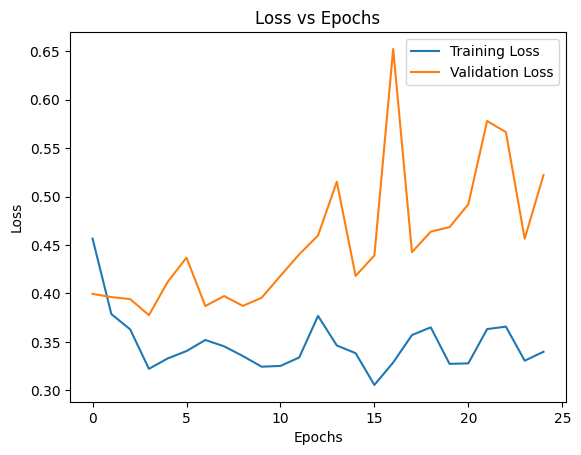

Hidden Layers: [4], Activation: ReLU(), LR: 0.1, Batch: 16, Epochs: 50
Training Loss: 0.3898, Validation Loss: 0.8007


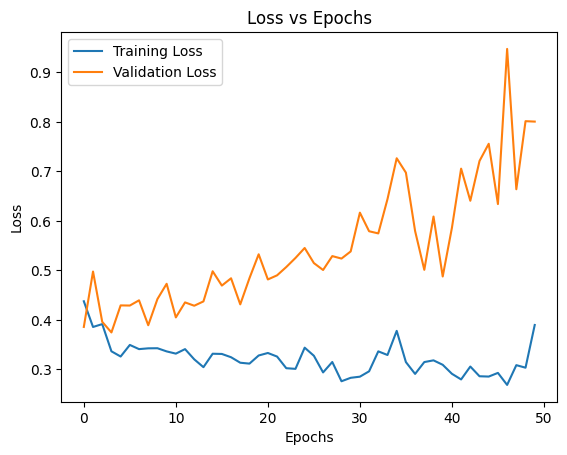

Hidden Layers: [4], Activation: ReLU(), LR: 0.1, Batch: 16, Epochs: 100
Training Loss: 0.3346, Validation Loss: 0.6522


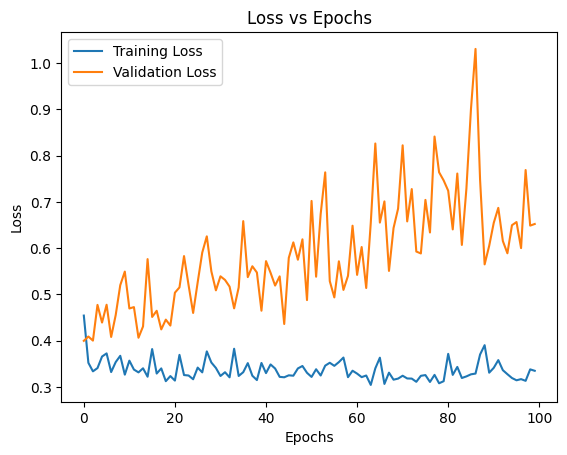

Hidden Layers: [4], Activation: ReLU(), LR: 0.1, Batch: 32, Epochs: 25
Training Loss: 0.2697, Validation Loss: 0.4621


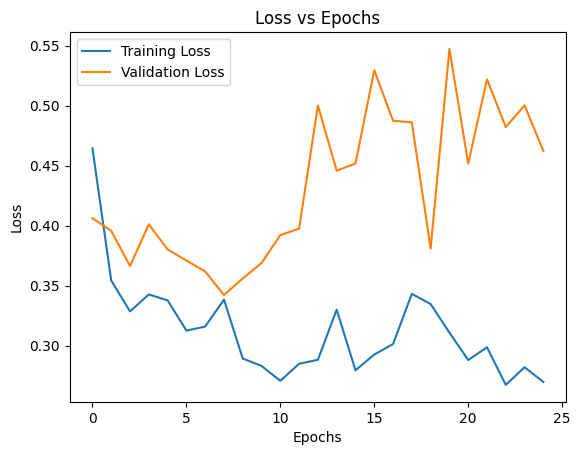

Hidden Layers: [4], Activation: ReLU(), LR: 0.1, Batch: 32, Epochs: 50
Training Loss: 0.2645, Validation Loss: 0.5788


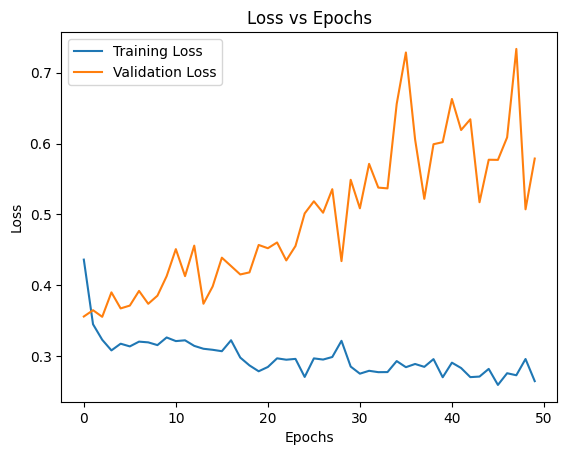

Hidden Layers: [4], Activation: ReLU(), LR: 0.1, Batch: 32, Epochs: 100
Training Loss: 0.2726, Validation Loss: 0.9738


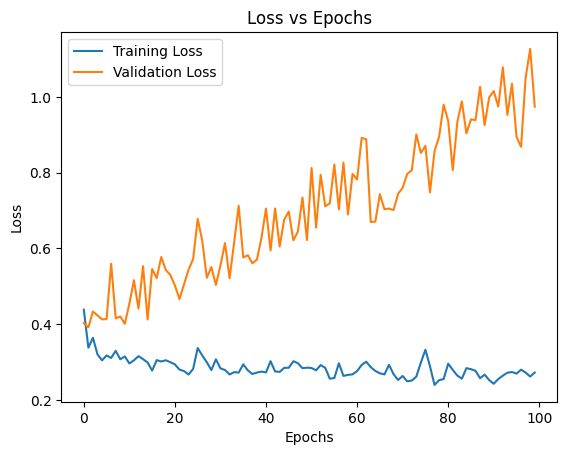

Hidden Layers: [4], Activation: ReLU(), LR: 0.1, Batch: 64, Epochs: 25
Training Loss: 0.2610, Validation Loss: 0.4507


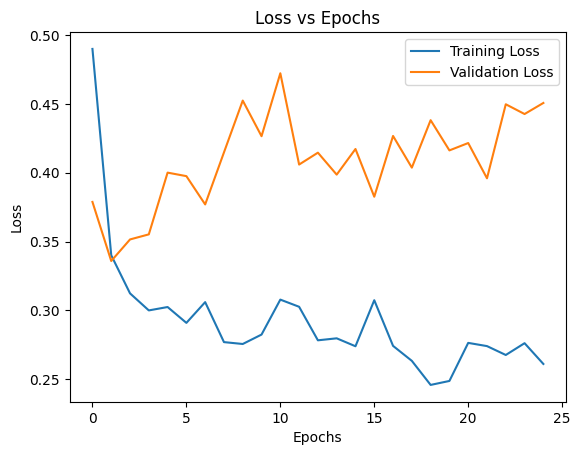

Hidden Layers: [4], Activation: ReLU(), LR: 0.1, Batch: 64, Epochs: 50
Training Loss: 0.2347, Validation Loss: 0.4362


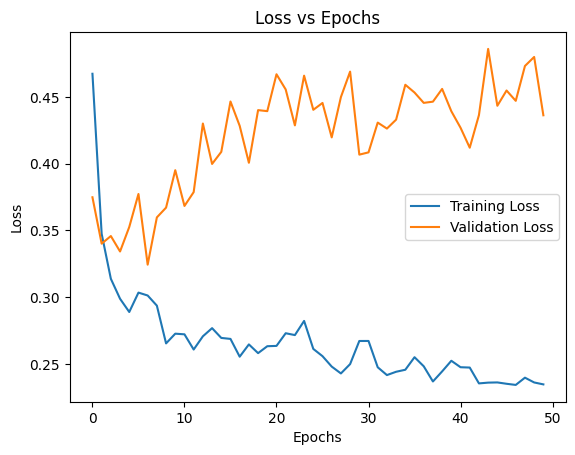

Hidden Layers: [4], Activation: ReLU(), LR: 0.1, Batch: 64, Epochs: 100
Training Loss: 0.2458, Validation Loss: 0.5872


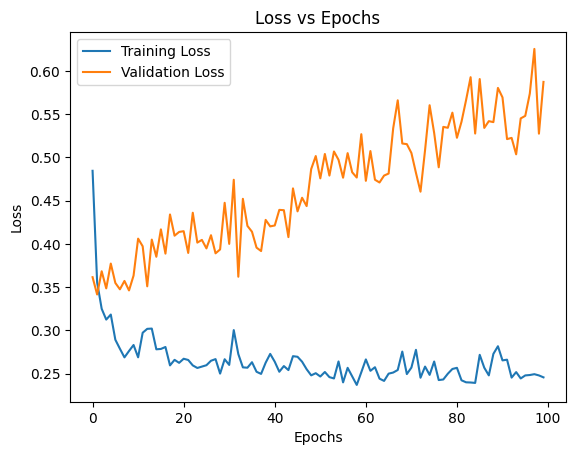

Hidden Layers: [4], Activation: ReLU(), LR: 0.01, Batch: 16, Epochs: 25
Training Loss: 0.2550, Validation Loss: 0.4276


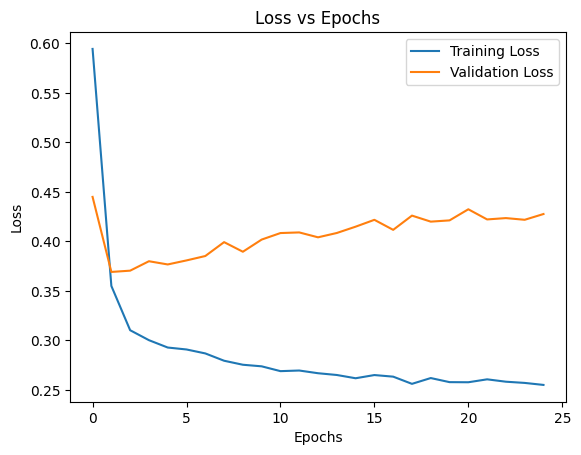

Hidden Layers: [4], Activation: ReLU(), LR: 0.01, Batch: 16, Epochs: 50
Training Loss: 0.2415, Validation Loss: 0.4737


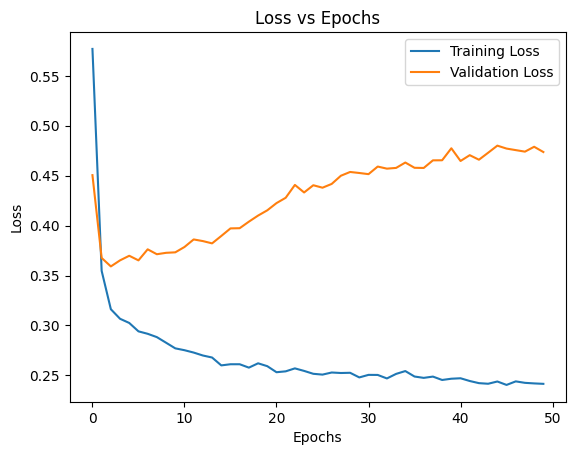

Hidden Layers: [4], Activation: ReLU(), LR: 0.01, Batch: 16, Epochs: 100
Training Loss: 0.2479, Validation Loss: 0.4678


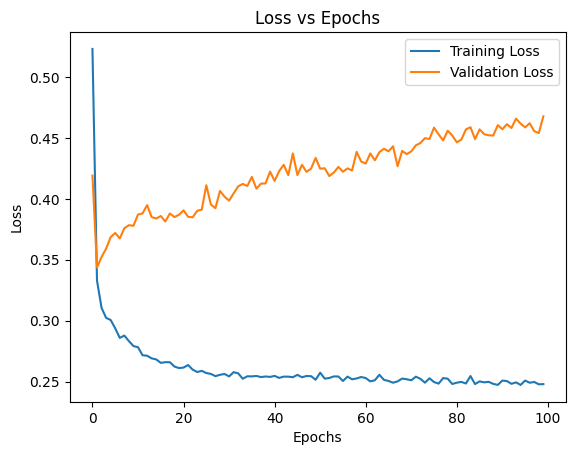

Hidden Layers: [4], Activation: ReLU(), LR: 0.01, Batch: 32, Epochs: 25
Training Loss: 0.2676, Validation Loss: 0.3780


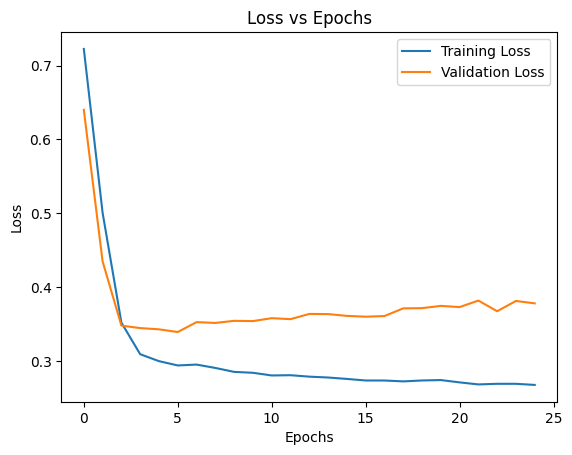

Hidden Layers: [4], Activation: ReLU(), LR: 0.01, Batch: 32, Epochs: 50
Training Loss: 0.2489, Validation Loss: 0.4102


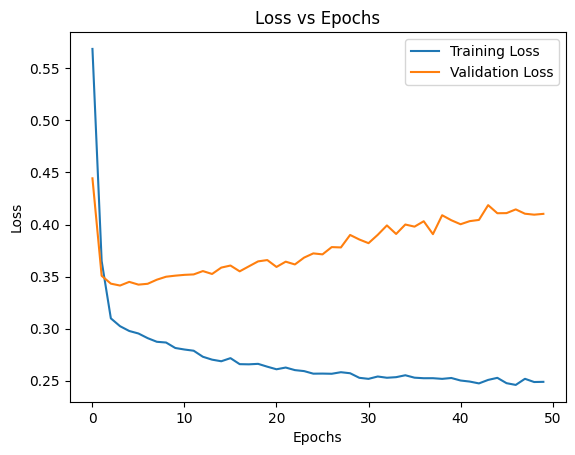

Hidden Layers: [4], Activation: ReLU(), LR: 0.01, Batch: 32, Epochs: 100
Training Loss: 0.2222, Validation Loss: 0.4813


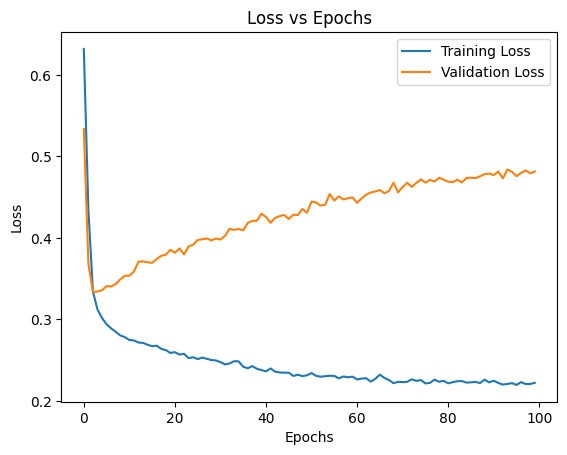

Hidden Layers: [4], Activation: ReLU(), LR: 0.01, Batch: 64, Epochs: 25
Training Loss: 0.2656, Validation Loss: 0.3324


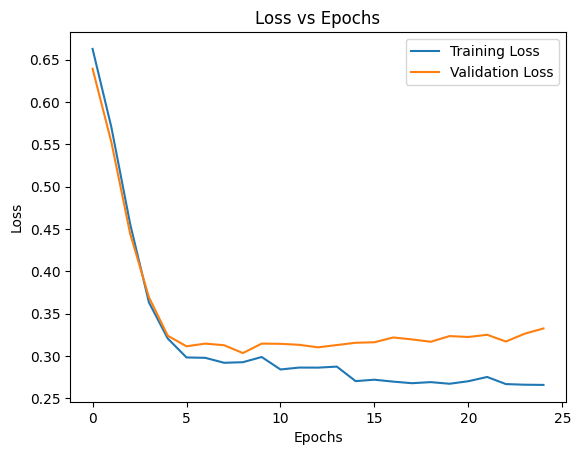

Hidden Layers: [4], Activation: ReLU(), LR: 0.01, Batch: 64, Epochs: 50
Training Loss: 0.2822, Validation Loss: 0.3165


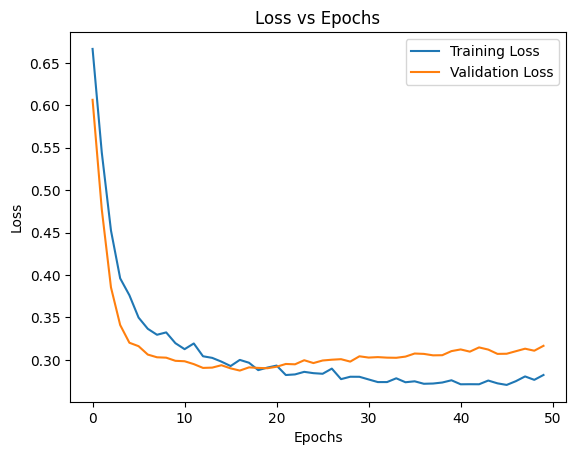

Hidden Layers: [4], Activation: ReLU(), LR: 0.01, Batch: 64, Epochs: 100
Training Loss: 0.2364, Validation Loss: 0.4594


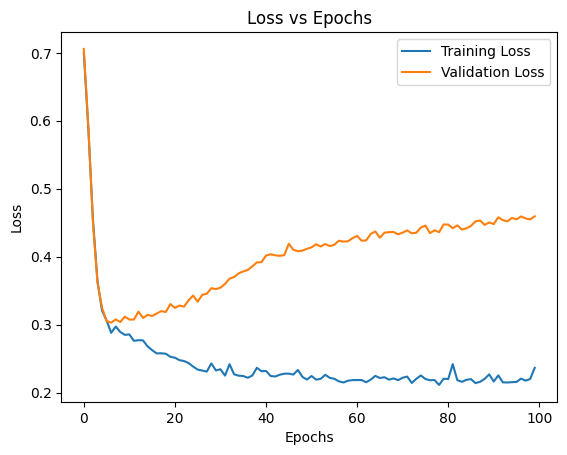

Hidden Layers: [4], Activation: ReLU(), LR: 0.001, Batch: 16, Epochs: 25
Training Loss: 0.3426, Validation Loss: 0.4268


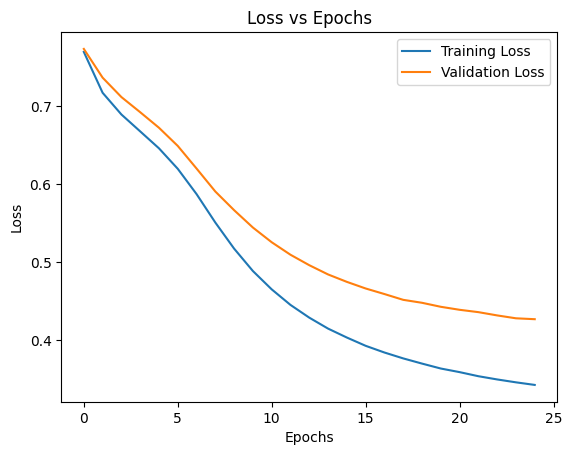

Hidden Layers: [4], Activation: ReLU(), LR: 0.001, Batch: 16, Epochs: 50
Training Loss: 0.3076, Validation Loss: 0.4034


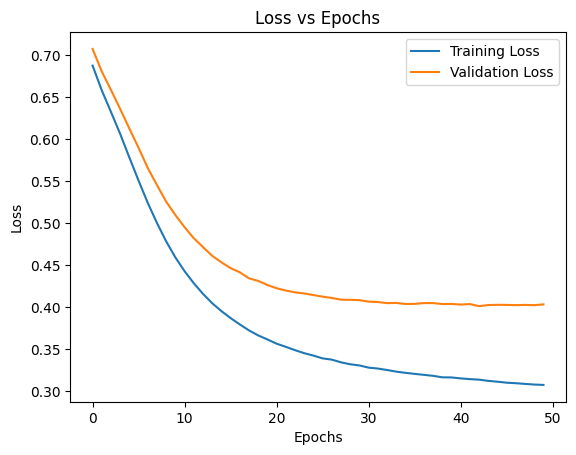

Hidden Layers: [4], Activation: ReLU(), LR: 0.001, Batch: 16, Epochs: 100
Training Loss: 0.2533, Validation Loss: 0.3978


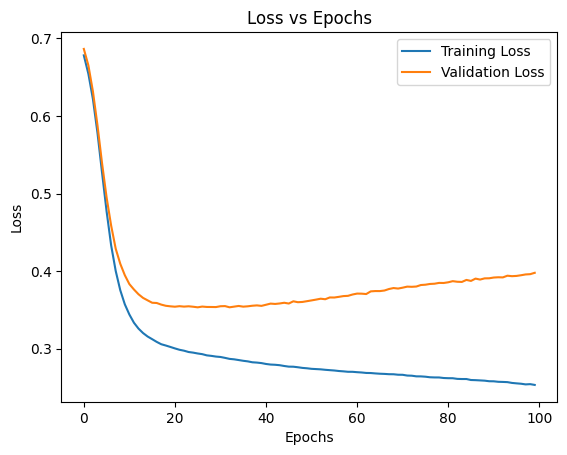

Hidden Layers: [4], Activation: ReLU(), LR: 0.001, Batch: 32, Epochs: 25
Training Loss: 0.3009, Validation Loss: 0.3487


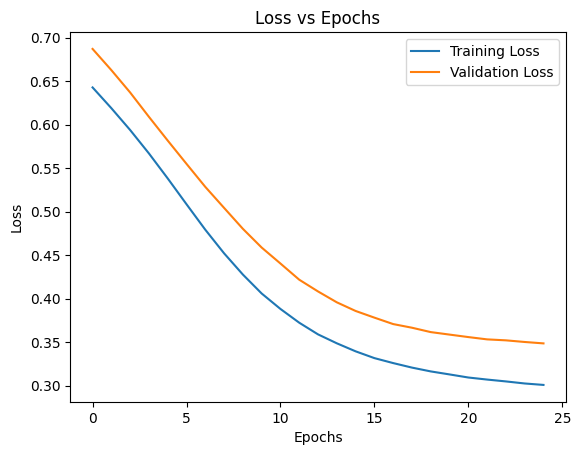

Hidden Layers: [4], Activation: ReLU(), LR: 0.001, Batch: 32, Epochs: 50
Training Loss: 0.2749, Validation Loss: 0.3435


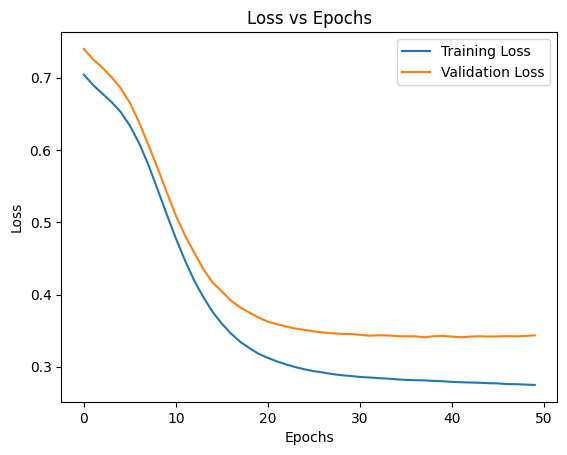

Hidden Layers: [4], Activation: ReLU(), LR: 0.001, Batch: 32, Epochs: 100
Training Loss: 0.2732, Validation Loss: 0.3592


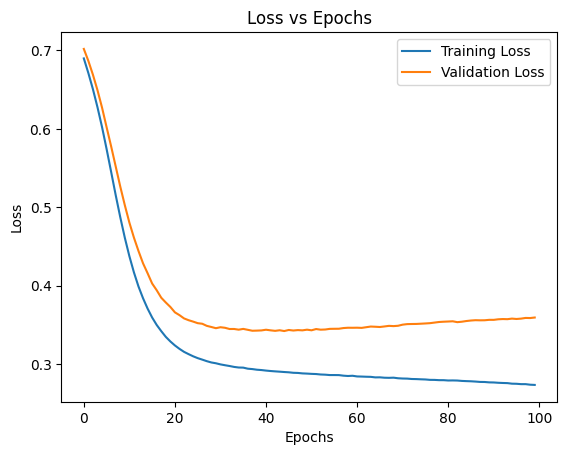

Hidden Layers: [4], Activation: ReLU(), LR: 0.001, Batch: 64, Epochs: 25
Training Loss: 0.3759, Validation Loss: 0.3984


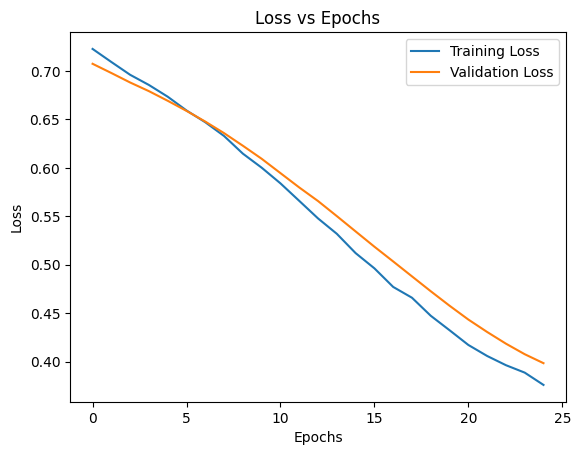

Hidden Layers: [4], Activation: ReLU(), LR: 0.001, Batch: 64, Epochs: 50
Training Loss: 0.2943, Validation Loss: 0.3227


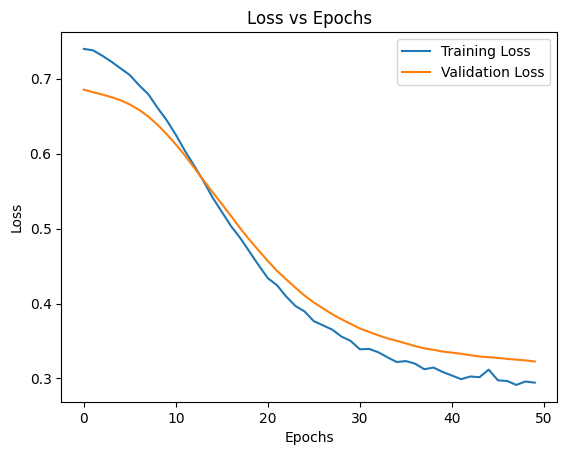

Hidden Layers: [4], Activation: ReLU(), LR: 0.001, Batch: 64, Epochs: 100
Training Loss: 0.2751, Validation Loss: 0.3078


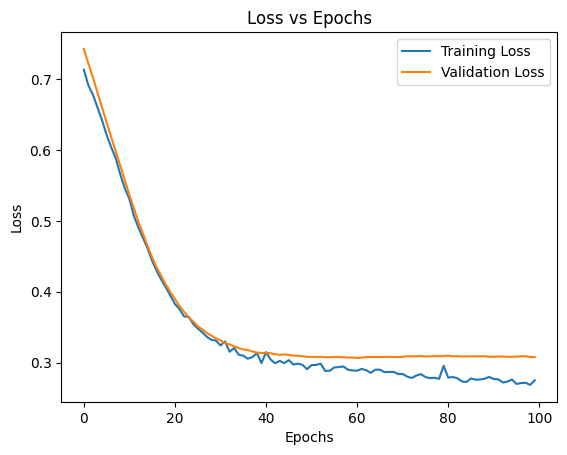

Hidden Layers: [4], Activation: ReLU(), LR: 0.0001, Batch: 16, Epochs: 25
Training Loss: 0.6228, Validation Loss: 0.6341


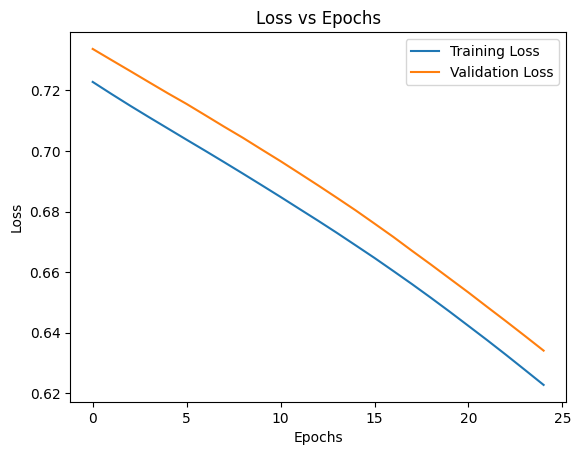

Hidden Layers: [4], Activation: ReLU(), LR: 0.0001, Batch: 16, Epochs: 50
Training Loss: 0.5452, Validation Loss: 0.5585


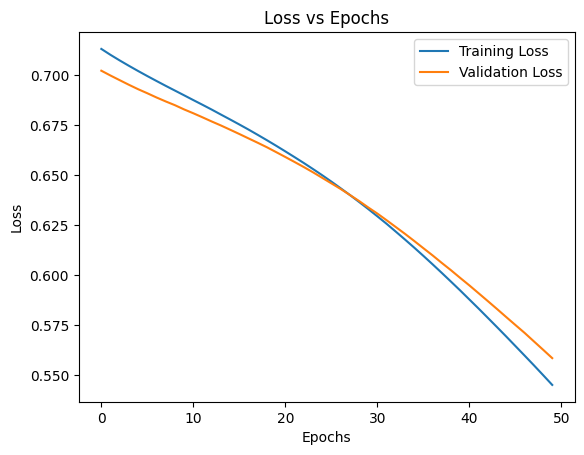

Hidden Layers: [4], Activation: ReLU(), LR: 0.0001, Batch: 16, Epochs: 100
Training Loss: 0.3500, Validation Loss: 0.4104


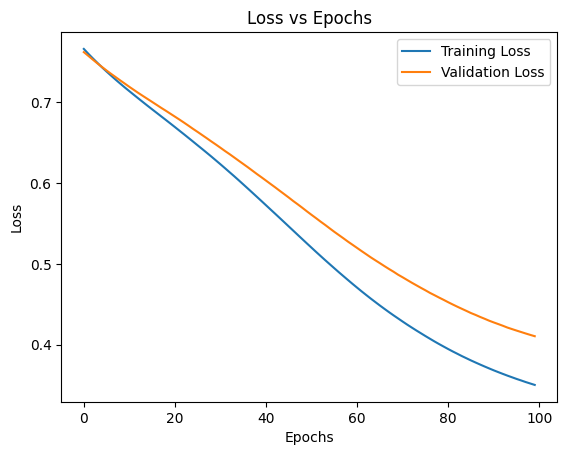

Hidden Layers: [4], Activation: ReLU(), LR: 0.0001, Batch: 32, Epochs: 25
Training Loss: 0.6593, Validation Loss: 0.6582


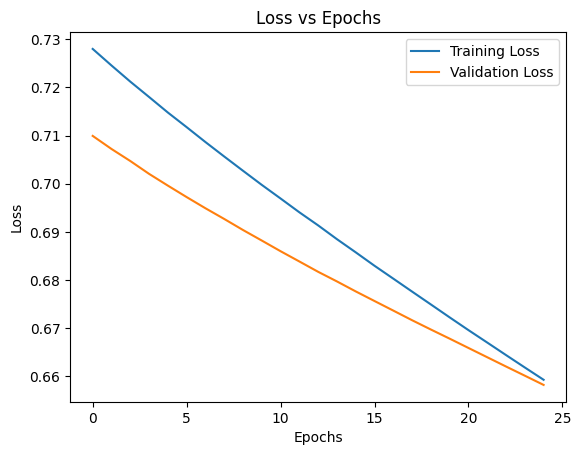

Hidden Layers: [4], Activation: ReLU(), LR: 0.0001, Batch: 32, Epochs: 50
Training Loss: 0.6346, Validation Loss: 0.6246


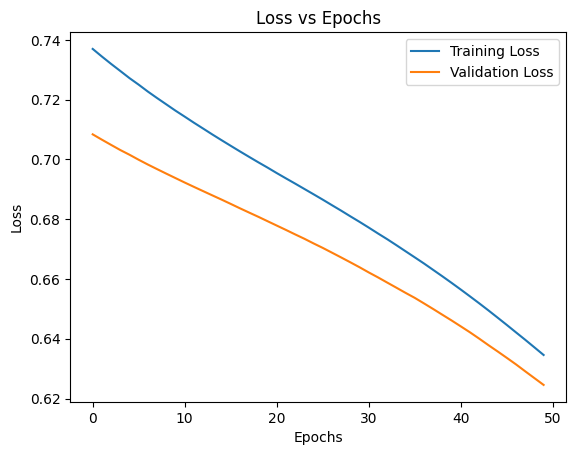

Hidden Layers: [4], Activation: ReLU(), LR: 0.0001, Batch: 32, Epochs: 100
Training Loss: 0.3972, Validation Loss: 0.4421


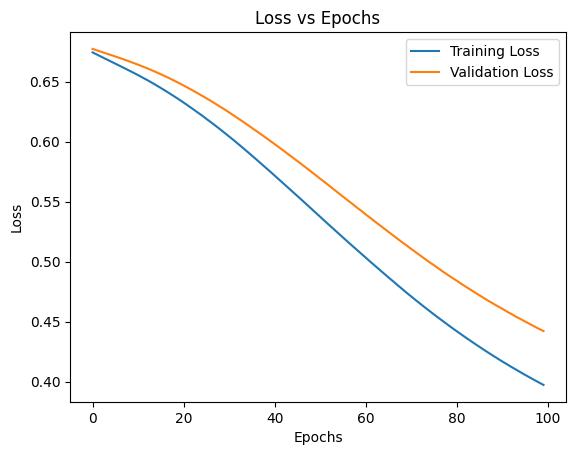

Hidden Layers: [4], Activation: ReLU(), LR: 0.0001, Batch: 64, Epochs: 25
Training Loss: 0.6755, Validation Loss: 0.7074


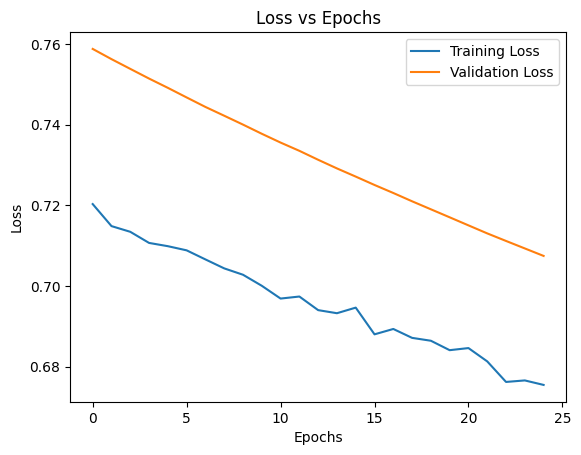

Hidden Layers: [4], Activation: ReLU(), LR: 0.0001, Batch: 64, Epochs: 50
Training Loss: 0.6493, Validation Loss: 0.6720


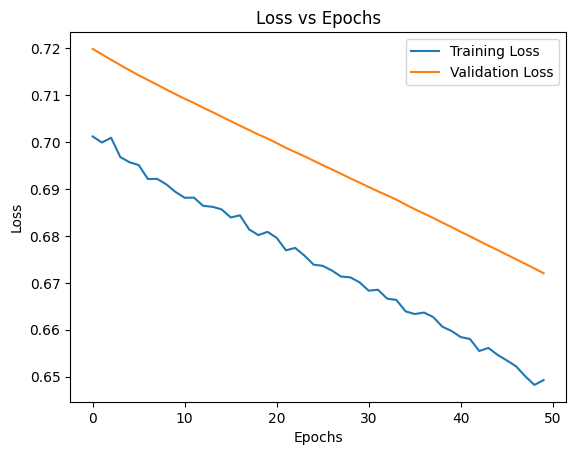

Hidden Layers: [4], Activation: ReLU(), LR: 0.0001, Batch: 64, Epochs: 100
Training Loss: 0.5978, Validation Loss: 0.6151


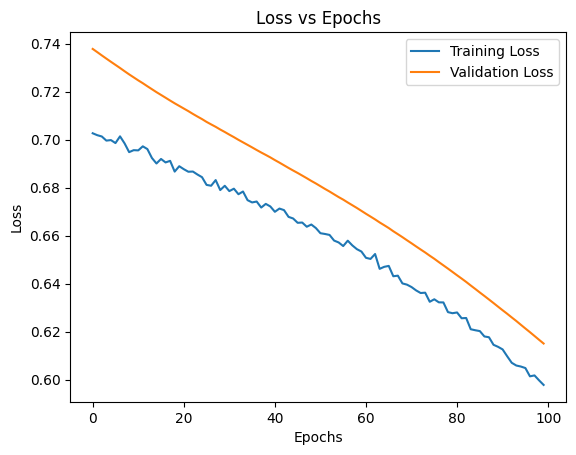

Hidden Layers: [4], Activation: Sigmoid(), LR: 0.1, Batch: 16, Epochs: 25
Training Loss: 0.2586, Validation Loss: 0.4131


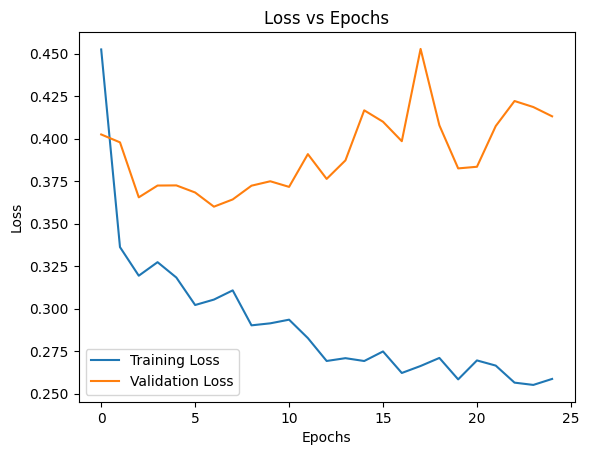

Hidden Layers: [4], Activation: Sigmoid(), LR: 0.1, Batch: 16, Epochs: 50
Training Loss: 0.2399, Validation Loss: 0.4675


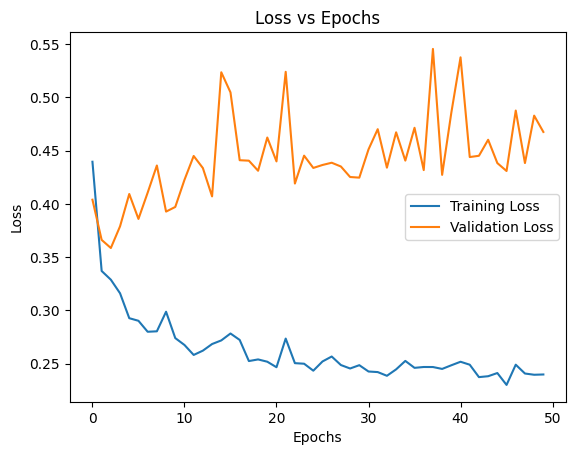

Hidden Layers: [4], Activation: Sigmoid(), LR: 0.1, Batch: 16, Epochs: 100
Training Loss: 0.2404, Validation Loss: 0.4791


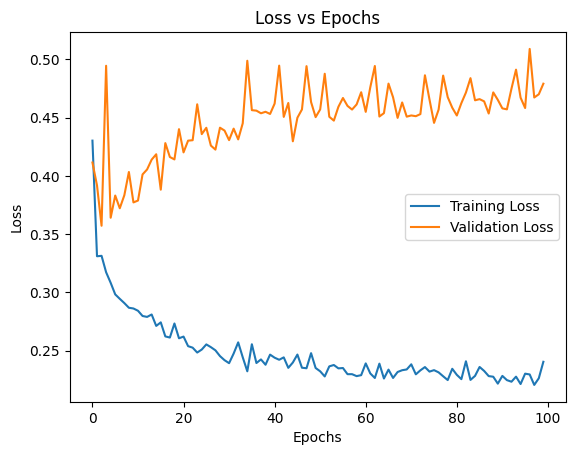

Hidden Layers: [4], Activation: Sigmoid(), LR: 0.1, Batch: 32, Epochs: 25
Training Loss: 0.2469, Validation Loss: 0.4005


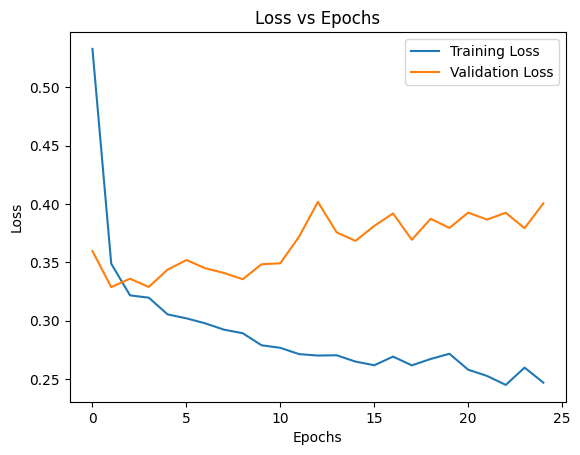

Hidden Layers: [4], Activation: Sigmoid(), LR: 0.1, Batch: 32, Epochs: 50
Training Loss: 0.2285, Validation Loss: 0.4255


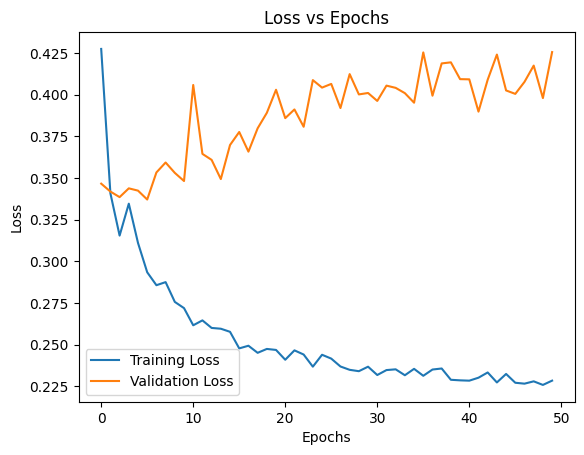

Hidden Layers: [4], Activation: Sigmoid(), LR: 0.1, Batch: 32, Epochs: 100
Training Loss: 0.2274, Validation Loss: 0.4154


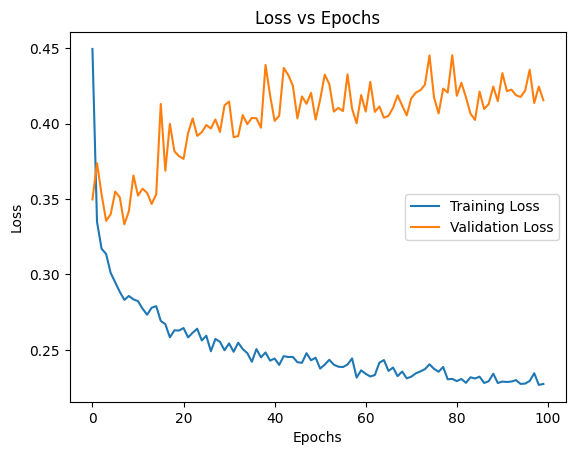

Hidden Layers: [4], Activation: Sigmoid(), LR: 0.1, Batch: 64, Epochs: 25
Training Loss: 0.2683, Validation Loss: 0.3477


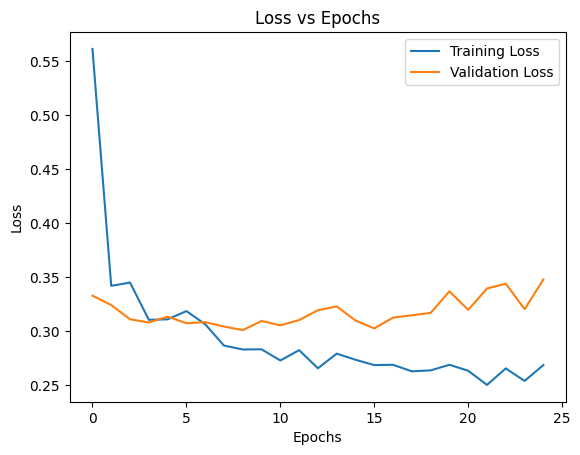

Hidden Layers: [4], Activation: Sigmoid(), LR: 0.1, Batch: 64, Epochs: 50
Training Loss: 0.2384, Validation Loss: 0.3559


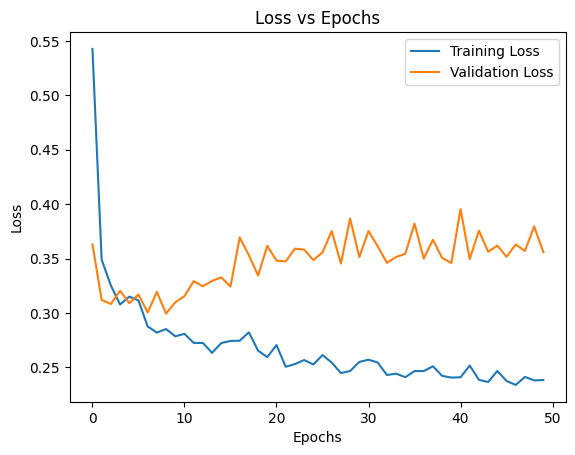

Hidden Layers: [4], Activation: Sigmoid(), LR: 0.1, Batch: 64, Epochs: 100
Training Loss: 0.2239, Validation Loss: 0.3617


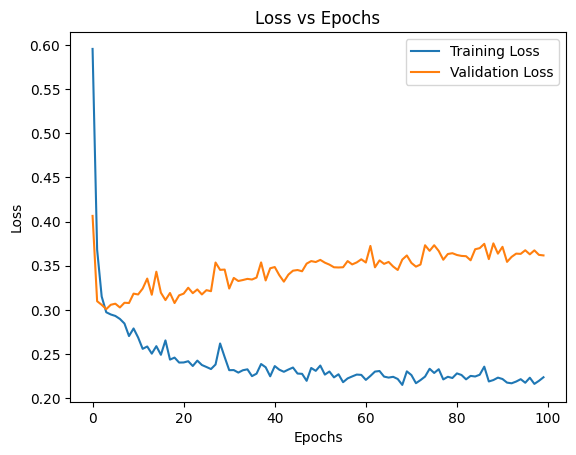

Hidden Layers: [4], Activation: Sigmoid(), LR: 0.01, Batch: 16, Epochs: 25
Training Loss: 0.2861, Validation Loss: 0.3504


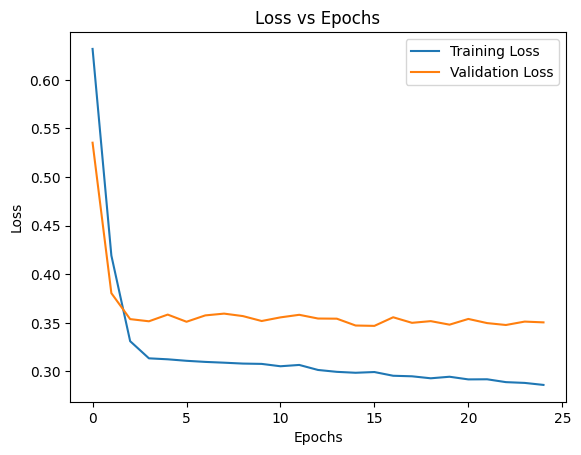

Hidden Layers: [4], Activation: Sigmoid(), LR: 0.01, Batch: 16, Epochs: 50
Training Loss: 0.2680, Validation Loss: 0.3896


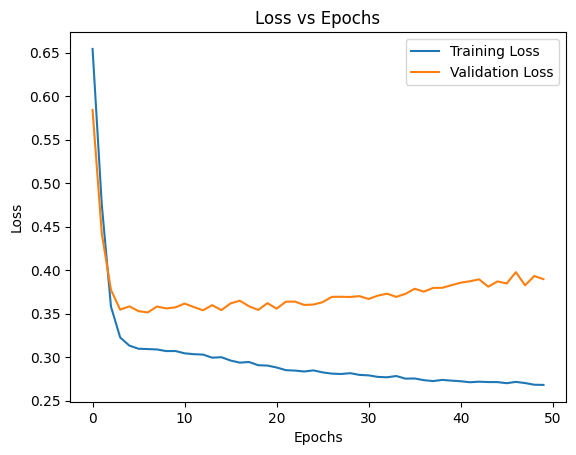

Hidden Layers: [4], Activation: Sigmoid(), LR: 0.01, Batch: 16, Epochs: 100
Training Loss: 0.2391, Validation Loss: 0.4505


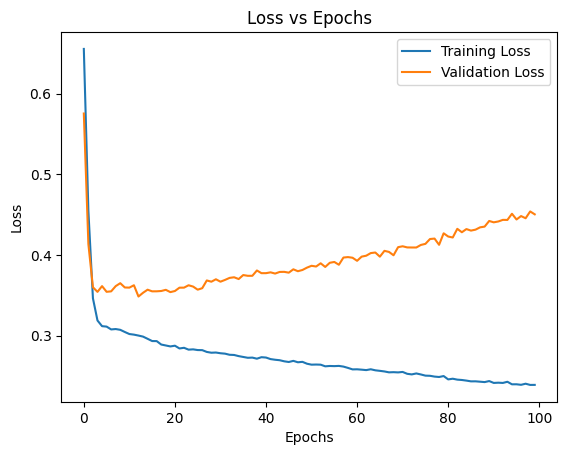

Hidden Layers: [4], Activation: Sigmoid(), LR: 0.01, Batch: 32, Epochs: 25
Training Loss: 0.2971, Validation Loss: 0.3361


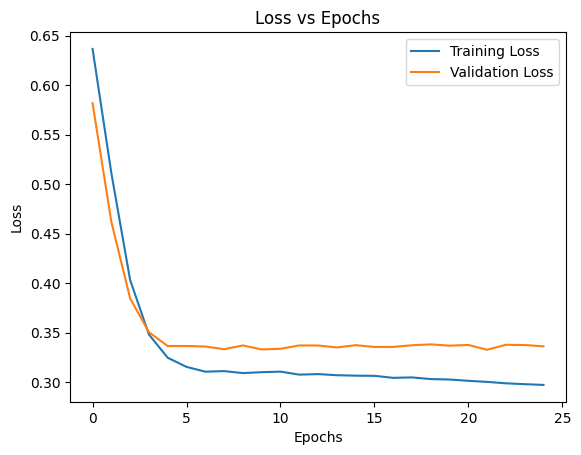

Hidden Layers: [4], Activation: Sigmoid(), LR: 0.01, Batch: 32, Epochs: 50
Training Loss: 0.2748, Validation Loss: 0.3426


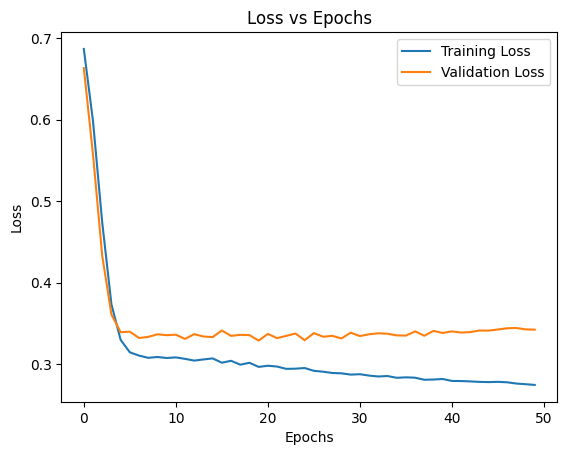

Hidden Layers: [4], Activation: Sigmoid(), LR: 0.01, Batch: 32, Epochs: 100
Training Loss: 0.2575, Validation Loss: 0.3641


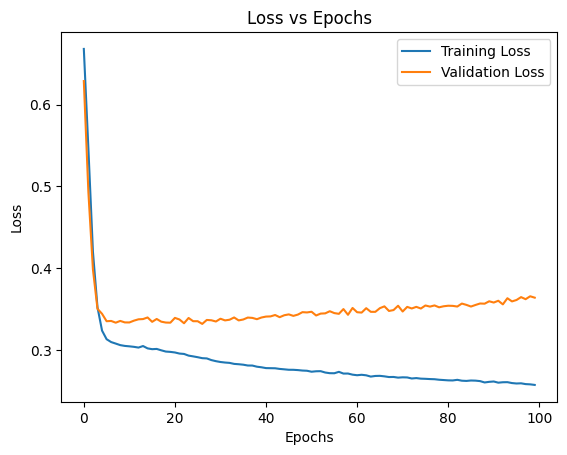

Hidden Layers: [4], Activation: Sigmoid(), LR: 0.01, Batch: 64, Epochs: 25
Training Loss: 0.2948, Validation Loss: 0.3036


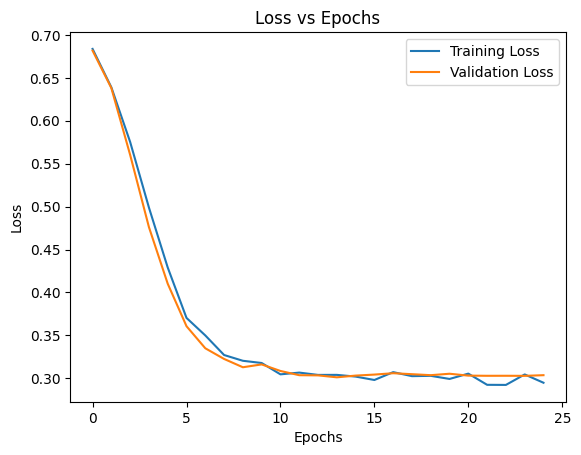

Hidden Layers: [4], Activation: Sigmoid(), LR: 0.01, Batch: 64, Epochs: 50
Training Loss: 0.2883, Validation Loss: 0.3091


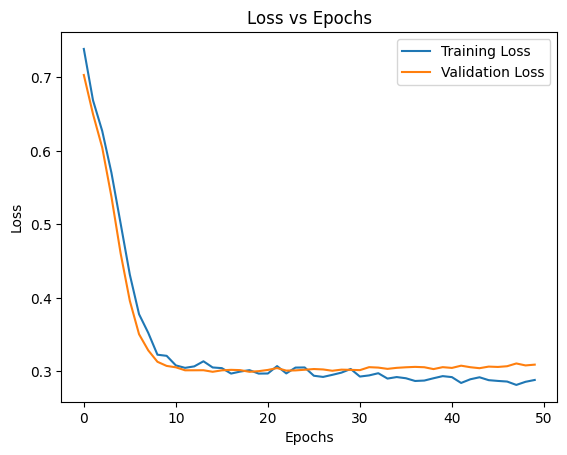

Hidden Layers: [4], Activation: Sigmoid(), LR: 0.01, Batch: 64, Epochs: 100
Training Loss: 0.2563, Validation Loss: 0.3299


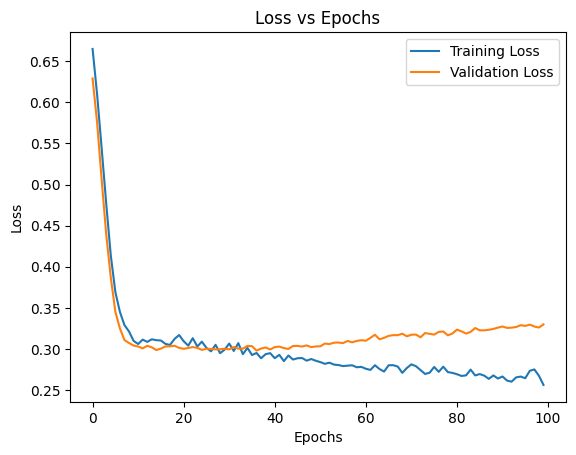

Hidden Layers: [4], Activation: Sigmoid(), LR: 0.001, Batch: 16, Epochs: 25
Training Loss: 0.3253, Validation Loss: 0.3642


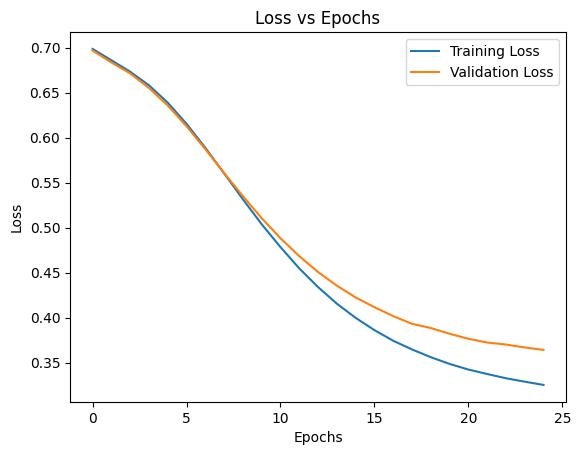

Hidden Layers: [4], Activation: Sigmoid(), LR: 0.001, Batch: 16, Epochs: 50
Training Loss: 0.3036, Validation Loss: 0.3551


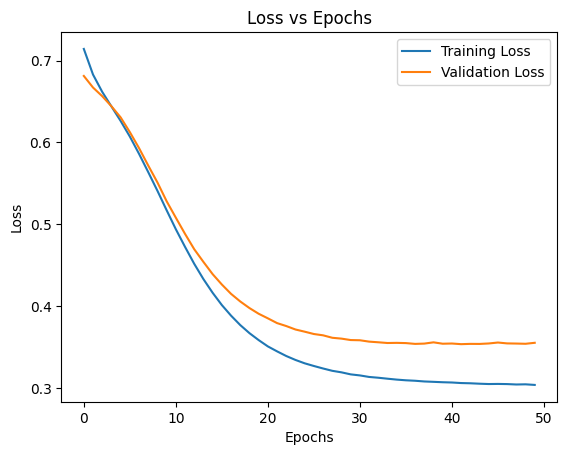

Hidden Layers: [4], Activation: Sigmoid(), LR: 0.001, Batch: 16, Epochs: 100
Training Loss: 0.2997, Validation Loss: 0.3555


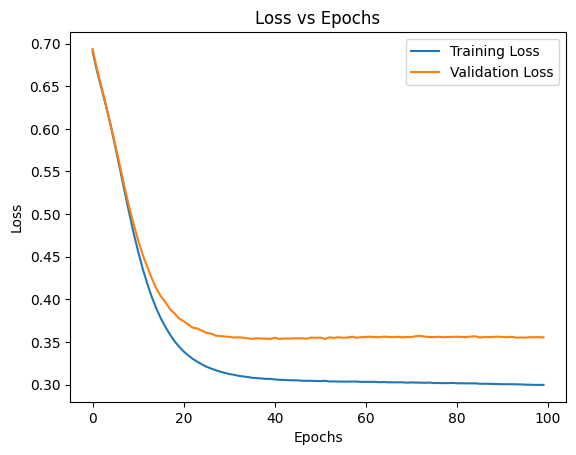

Hidden Layers: [4], Activation: Sigmoid(), LR: 0.001, Batch: 32, Epochs: 25
Training Loss: 0.4056, Validation Loss: 0.4116


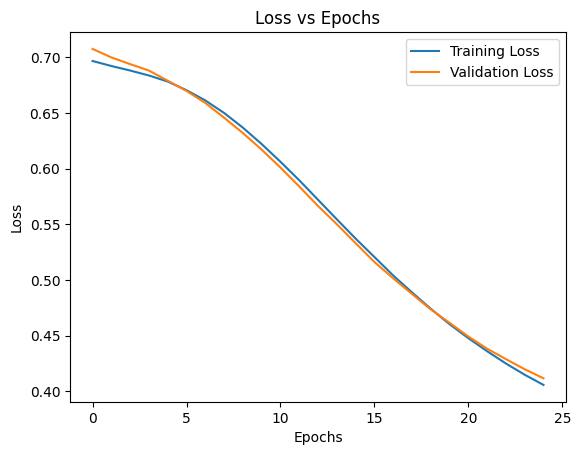

Hidden Layers: [4], Activation: Sigmoid(), LR: 0.001, Batch: 32, Epochs: 50
Training Loss: 0.3218, Validation Loss: 0.3445


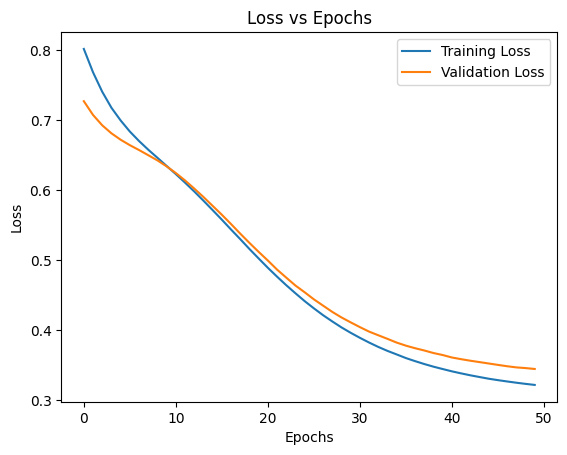

Hidden Layers: [4], Activation: Sigmoid(), LR: 0.001, Batch: 32, Epochs: 100
Training Loss: 0.3027, Validation Loss: 0.3371


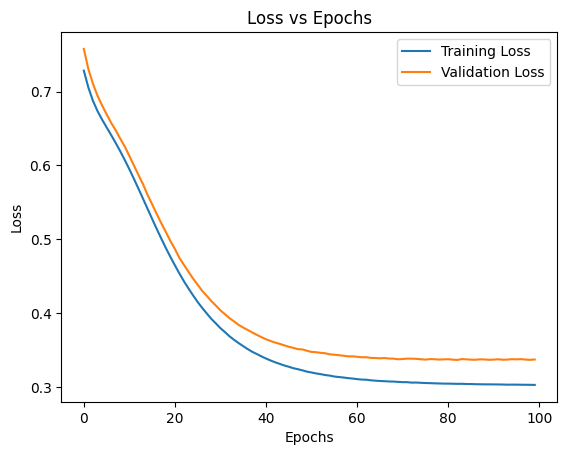

Hidden Layers: [4], Activation: Sigmoid(), LR: 0.001, Batch: 64, Epochs: 25
Training Loss: 0.5654, Validation Loss: 0.5642


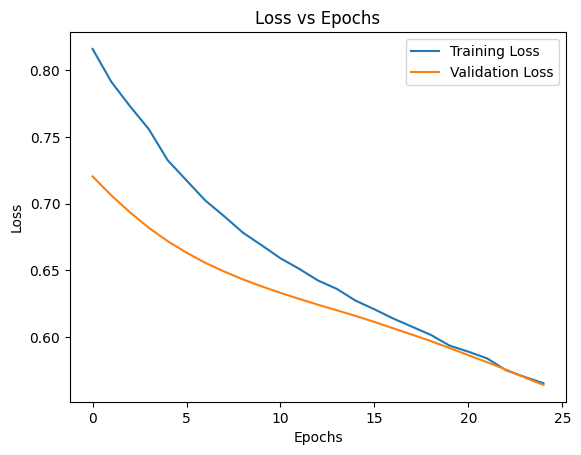

In [ ]:
for hidden_layers in hidden_layer_configs:
    for activation_fn in activation_functions:
        for lr in learning_rates:
            for batch_size in batch_sizes:
                for num_epochs in epochs_list:
                    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
                    val_loader = DataLoader(val_dataset, batch_size=batch_size)

                    model = create_mlp(X_train.shape[1], hidden_layers, activation_fn)
                    criterion = nn.CrossEntropyLoss()
                    optimizer = optim.Adam(model.parameters(), lr=lr)

                    train_losses, val_losses = train_model(
                        model, train_loader, val_loader, criterion, optimizer, num_epochs
                    )

                    print(f"Hidden Layers: {hidden_layers}, Activation: {activation_fn}, LR: {lr}, Batch: {batch_size}, Epochs: {num_epochs}")
                    print(f"Training Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}")
                    plot_losses(train_losses, val_losses)

Penjelasan ringkas:

Loop nested: Berjalan melalui semua kombinasi konfigurasi (hidden layers, activation functions, learning rates, batch sizes, epochs).
DataLoader: Membuat train_loader dan val_loader dengan batch ukuran yang ditentukan.
Model: Membuat MLP dengan konfigurasi yang dipilih.
Loss & Optimizer: Menggunakan CrossEntropyLoss dan optimizer Adam dengan learning rate tertentu.
Training: Melatih model menggunakan train_model dan mencetak hasil loss terakhir.
Plot: Memvisualisasikan loss selama training dan validasi.